In [20]:
'''
    Disciplina "IN1165 Tópicos Avançados em Inteligência Computacional"
    Atividade 1, estudo de algoritmos de inteligência artificial - Árvores de Decisão
    Descrição da atividade:
        Com base no Colab oferecido pelo professor da disciplina,
        foi feito teste com outra base [1].
    Dificuldades:
        A princípio, trabalhar com bases diferentes, com dados não numéricos é meu objetivo.
        Essa era similar a diabetes, ou seja, com números.
        A dissociação desta seria em que 1 representava indivícuos cardíacos e seus dados os demais.
        Usei DataSet.Replace e apliquei, renomeando 1 para 'cardiaco' e 0 'normal'
        Os resultados divegem pouco e atingi meu objetivo primário
    Bibliografia:
        [1] KAGLE. Arquivo "cardio_train.csv". Disponível em <https://www.kaggle.com/datasets>. Acesso em 11 de Mar. de 2024.
'''

'\n    Disciplina "IN1165 Tópicos Avançados em Inteligência Computacional"\n    Atividade 1, estudo de algoritmos de inteligência artificial - Árvores de Decisão\n    Descrição da atividade:\n        Com base no Colab oferecido pelo professor da disciplina,\n        foi feito teste com outra base [1].\n    Dificuldades:\n        A princípio, trabalhar com bases diferentes, com dados não numéricos é meu objetivo.\n        Essa era similar a diabetes, ou seja, com números.\n        A dissociação desta seria em que 1 representava indivícuos cardíacos e seus dados os demais.\n        Usei DataSet.Replace e apliquei, renomeando 1 para \'cardiaco\' e 0 \'normal\'\n        Os resultados divegem pouco e atingi meu objetivo primário\n        - estarei, adiante, estudando o uso de analise de dados com outras bases com mais descrições e menos números\n        - prevejo trabalhar mais o Pandas\n    Bibliografia:\n        [1] KAGLE. Arquivo "cardio_train.csv". Disponível em <https://www.kaggle.com/

In [21]:
import pandas as pd

import pydotplus #pip install pydotplus
import numpy as np

In [22]:
df = pd.read_csv('cardio_train.csv')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['cardio'])
Y = df['cardio']#cardio é o dado que calcula acerto e erro, 1 é cardiaco

Y.replace(1,'cardiac')
Y.replace(0,'normal')

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2,min_samples_leaf = 30)

dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=30)

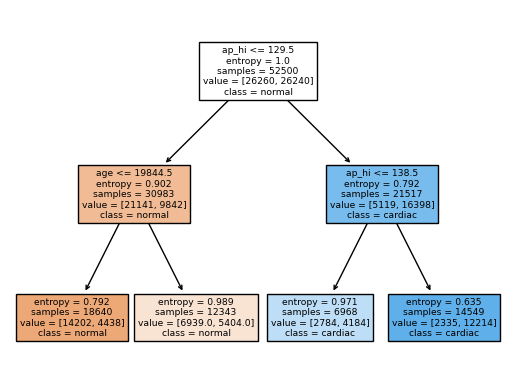

In [6]:
from sklearn import tree


tree.plot_tree(dt, feature_names = X.columns, class_names=['normal', "cardiac"],filled = True);

In [25]:
from sklearn.metrics import accuracy_score

Yhat = dt.predict(X_test)
yTree = Yhat
accTree = accuracy_score(Y_test,Yhat)
print("Acurácia dos dados de teste  : ", accTree)

Acurácia dos dados de teste  :  0.7144571428571429


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


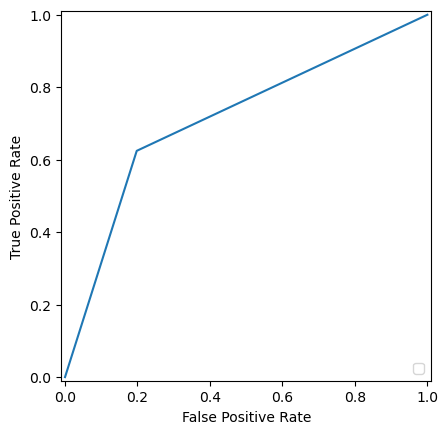

In [31]:
'''
Calculating ROC curve for DecisionTree
'''
from sklearn.metrics import RocCurveDisplay, roc_curve

#_score = dt.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, Yhat, pos_label=dt.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

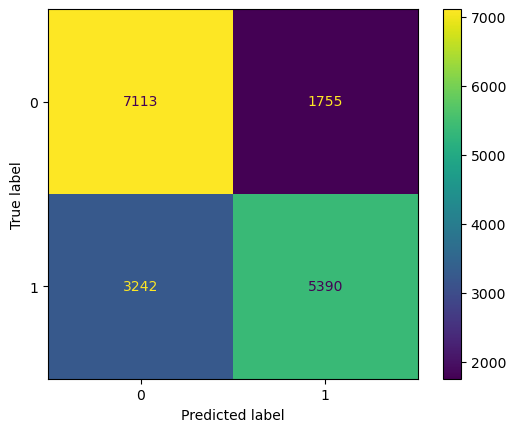

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=dt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)

disp.plot()

plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, max_features = 3)

rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=3, n_estimators=200)

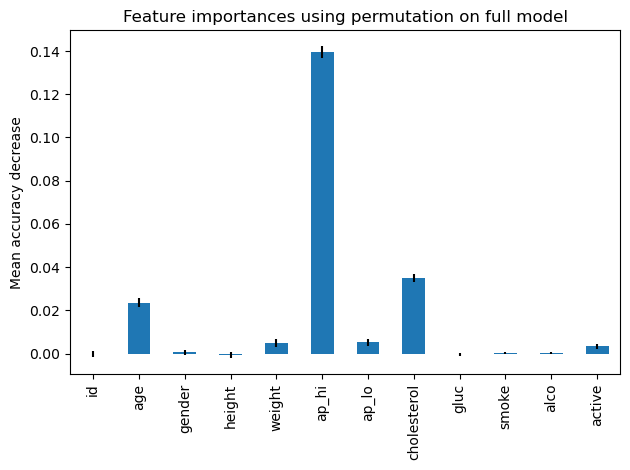

In [34]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import accuracy_score

Yhat = rf.predict(X_test)
yRandomForest = Yhat
accRandomForest = accuracy_score(Y_test,Yhat)
print("Acurácia dos dados de teste  : ", accRandomForest)

Acurácia dos dados de teste  :  0.7246285714285714


In [36]:
rf.predict(X_test)

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [37]:
rf.predict_proba(X_test)

array([[0.495, 0.505],
       [0.12 , 0.88 ],
       [0.44 , 0.56 ],
       ...,
       [0.375, 0.625],
       [0.52 , 0.48 ],
       [0.805, 0.195]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


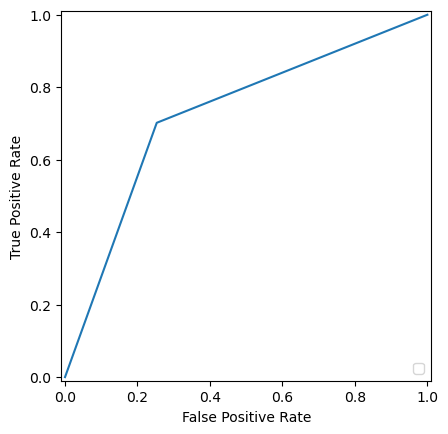

In [38]:
'''
Calculating ROC curve for Random Forest
'''
from sklearn.metrics import RocCurveDisplay, roc_curve

#_score = dt.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, Yhat, pos_label=rf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

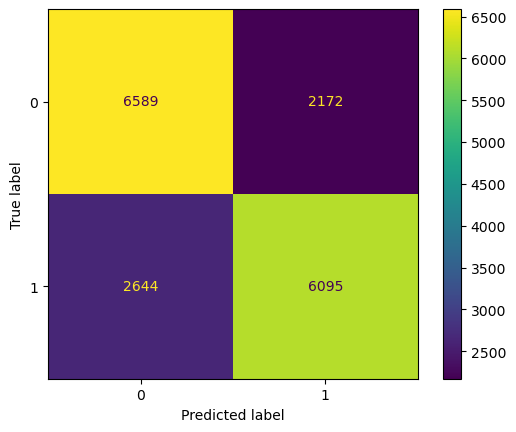

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix
cm = confusion_matrix(Y_test, Yhat, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()

plt.show()

In [15]:
yConfusionMatrix = Yhat
accConfusionMatrix = accuracy_score(Y_test,Yhat)
print("Acurácia dos dados de teste  : ", accConfusionMatrix)

Acurácia dos dados de teste  :  0.7248


Dataset 20newsgroup, train_samples=52500, n_features=12, n_classes=2
[model=One versus Rest, solver=saga] Number of epochs: 1
[model=One versus Rest, solver=saga] Number of epochs: 2
[model=One versus Rest, solver=saga] Number of epochs: 3
Test accuracy for model ovr: 0.5214
% non-zero coefficients for model ovr, per class:
 [100.]
Run time (3 epochs) for model ovr:0.19
[model=Multinomial, solver=saga] Number of epochs: 1
[model=Multinomial, solver=saga] Number of epochs: 2
[model=Multinomial, solver=saga] Number of epochs: 5
Test accuracy for model multinomial: 0.5264
% non-zero coefficients for model multinomial, per class:
 [100.]
Run time (5 epochs) for model multinomial:0.30
Example run in 5.074 s


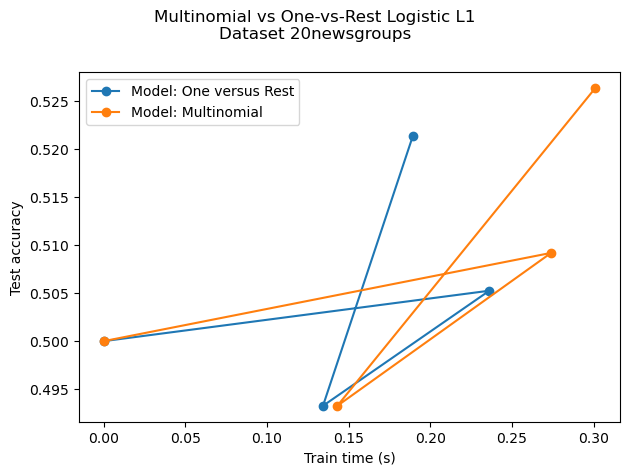

In [40]:
'''
Código adaptado do original de:
Arthur Mensch. Multiclass sparse logistic regression on 20newgroups.
Diponível em <https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_20newsgroups.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-20newsgroups-py>.
Acesso em 11 de Março de 2024.
'''

import timeit
import warnings

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
t0 = timeit.default_timer()

# We use SAGA solver
solver = "saga"

# Turn down for faster run time
'''
n_samples = 50#5000

Xrl, Yrl = fetch_20newsgroups_vectorized(subset="all", return_X_y=True)
Xrl = Xrl[:n_samples]
Yrl = Yrl[:n_samples]

X_train_rl, X_test_rl, Y_train_rl, Y_test_rl = train_test_split(Xrl, Yrl, random_state=42, stratify=Yrl, test_size=0.1)
'''
train_samples, n_features = X_train.shape
n_classes = np.unique(Y).shape[0]

print(
    "Dataset 20newsgroup, train_samples=%i, n_features=%i, n_classes=%i"
    % (train_samples, n_features, n_classes)
)

models = {
    "ovr": {"name": "One versus Rest", "iters": [1, 2, 3]},
    "multinomial": {"name": "Multinomial", "iters": [1, 2, 5]},
}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params["iters"]:
        print(
            "[model=%s, solver=%s] Number of epochs: %s"
            % (model_params["name"], solver, this_max_iter)
        )
        lr = LogisticRegression(
            solver=solver,
            multi_class=model,
            penalty="l1",
            max_iter=this_max_iter,
            random_state=42,
        )
        t1 = timeit.default_timer()
        lr.fit(X_train, Y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == Y_test) / Y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]["times"] = times
    models[model]["densities"] = densities
    models[model]["accuracies"] = accuracies
    print("Test accuracy for model %s: %.4f" % (model, accuracies[-1]))
    print(
        "%% non-zero coefficients for model %s, per class:\n %s"
        % (model, densities[-1])
    )
    print(
        "Run time (%i epochs) for model %s:%.2f"
        % (model_params["iters"][-1], model, times[-1])
    )

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]["name"]
    times = models[model]["times"]
    accuracies = models[model]["accuracies"]
    ax.plot(times, accuracies, marker="o", label="Model: %s" % name)
    ax.set_xlabel("Train time (s)")
    ax.set_ylabel("Test accuracy")
ax.legend()
fig.suptitle("Multinomial vs One-vs-Rest Logistic L1\nDataset %s" % "20newsgroups")
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("Example run in %.3f s" % run_time)
plt.show()

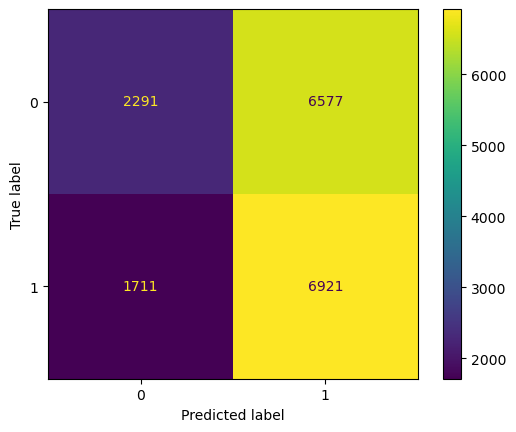

In [42]:
Yhat = lr.predict(X_test)

# Displaying the confusion matrix
cm = confusion_matrix(Y_test, Yhat, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


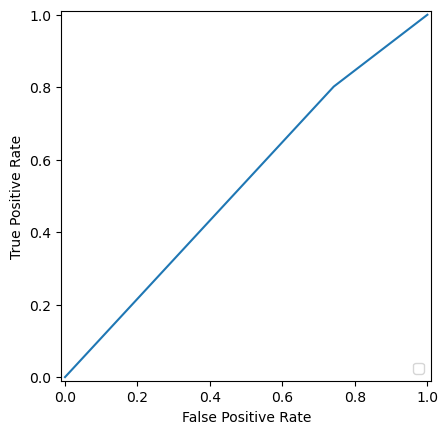

In [43]:
'''
Calculating ROC curve for Logistic Regression
'''

fpr, tpr, _ = roc_curve(Y_test, Yhat, pos_label=rf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
Y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (Y_test != Y_pred).sum()))

Number of mislabeled points out of a total 17500 points : 7990


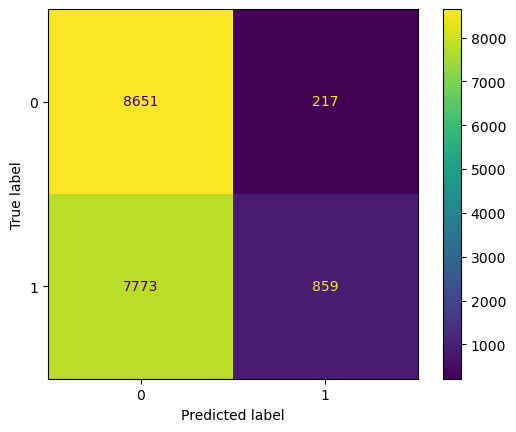

Acurácia dos dados de teste  :  0.5434285714285715


In [46]:
Yhat = gnb.predict(X_test)

# Displaying the confusion matrix
cm = confusion_matrix(Y_test, Yhat, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()

plt.show()

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


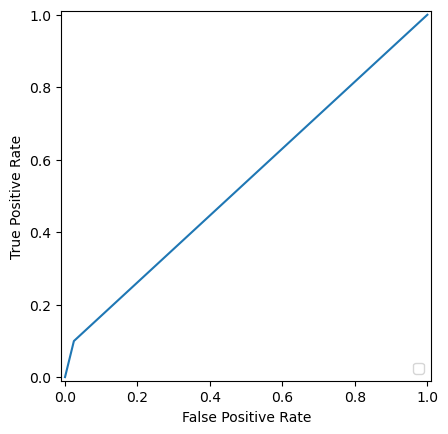

In [47]:
'''
Calculating ROC curve for Gaussian Naive Bayes
'''

fpr, tpr, _ = roc_curve(Y_test, Yhat, pos_label=rf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_
Yhat = kmeans.predict(X_test)
print("Centers",kmeans.cluster_centers_)

Centers [[7.48884001e+04 1.94799082e+04 1.34915795e+00 1.64317898e+02
  7.41816798e+01 1.29509475e+02 9.62209273e+01 1.37166956e+00
  1.22736728e+00 8.71113897e-02 5.39993731e-02 8.04205967e-01]
 [2.49236763e+04 1.94577646e+04 1.34998711e+00 1.64400779e+02
  7.42298281e+01 1.28121408e+02 9.70420832e+01 1.36204773e+00
  1.22554215e+00 8.91511731e-02 5.35422695e-02 8.03248632e-01]]


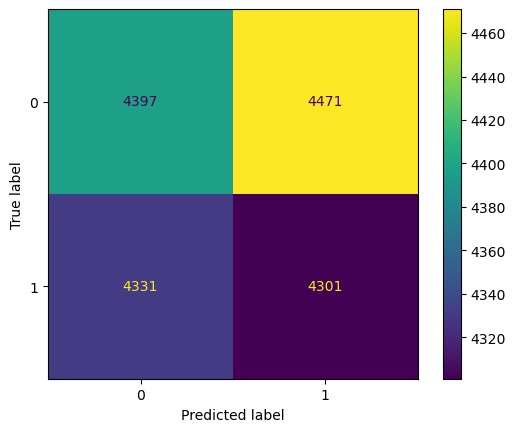

Acurácia dos dados de teste  :  0.49702857142857143


In [49]:
# Displaying the confusion matrix
cm = confusion_matrix(Y_test, Yhat, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()

plt.show()

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


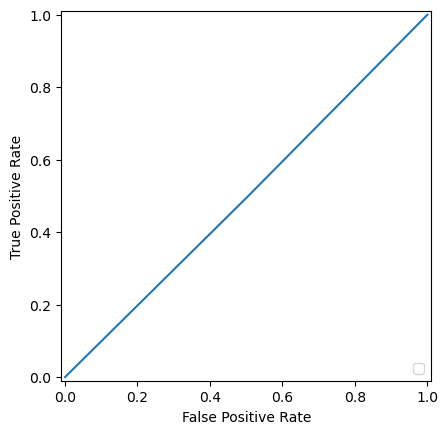

In [50]:
'''
Calculating ROC curve for Kmeans
'''

fpr, tpr, _ = roc_curve(Y_test, Yhat, pos_label=rf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
'''
Resultados:
Na Inteligência artificial, 
> Falsos positivos são elementos suspeitos sem o serem de fato
> Verdadeiros positivos o inverso deles
ROC (Receiver Operating Characteristic)[3] é uma ferramenta poderosa para medir e especificar problemas no desempenho do diagnóstico
Percebemos, nos modelos:
- Árvore de Decisão teve uma "melhor" curva com mais verdadeiros positivos (melhores resultados), representado, também pela alta acurácia 0.7144571428571429
- Random Forest ficaria em segundo lugar por aumento de falsos positivos e indicação da acurácia de 0.7246285714285714
- Gaussian Naive Bayes obteve precisão 0.5434285714285715 e uma curva ROC boa em pouca parte do inicio, depois se tornando quase linear
- Logistic Regression ficaria em quartu lugar com precisão 0.5264 e uma curva ROC quase linear
- Kmeans teve acurácia 0.49702857142857143 e ficou com curva ROC linear entre taxa de verdadeiros e falsos positivos.

O método mais indicado é a Árvore de Decisão nesse tipo de dado,

Referência:
[3] Braga, A. C. Curvas ROC: aspectos funcionais e aplicações. Tese de doutorado. University of Minho. 2001.
'''